In [4]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

In [6]:
# Load the dataset
file_path = 'C:\\Users\\taman\\Desktop\\edunet project\\UCI_Credit_Card.csv'
df = pd.read_csv(file_path)

In [7]:
# Display the first few rows of the dataset
print(df.head())

   ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  PAY_4  \
0   1    20000.0    2          2         1   24      2      2     -1     -1   
1   2   120000.0    2          2         2   26     -1      2      0      0   
2   3    90000.0    2          2         2   34      0      0      0      0   
3   4    50000.0    2          2         1   37      0      0      0      0   
4   5    50000.0    1          2         1   57     -1      0     -1      0   

   ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  \
0  ...        0.0        0.0        0.0       0.0     689.0       0.0   
1  ...     3272.0     3455.0     3261.0       0.0    1000.0    1000.0   
2  ...    14331.0    14948.0    15549.0    1518.0    1500.0    1000.0   
3  ...    28314.0    28959.0    29547.0    2000.0    2019.0    1200.0   
4  ...    20940.0    19146.0    19131.0    2000.0   36681.0   10000.0   

   PAY_AMT4  PAY_AMT5  PAY_AMT6  default.payment.next.month  
0       0.0       0.0   

In [8]:
# Display basic information about the dataset
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   LIMIT_BAL                   30000 non-null  float64
 2   SEX                         30000 non-null  int64  
 3   EDUCATION                   30000 non-null  int64  
 4   MARRIAGE                    30000 non-null  int64  
 5   AGE                         30000 non-null  int64  
 6   PAY_0                       30000 non-null  int64  
 7   PAY_2                       30000 non-null  int64  
 8   PAY_3                       30000 non-null  int64  
 9   PAY_4                       30000 non-null  int64  
 10  PAY_5                       30000 non-null  int64  
 11  PAY_6                       30000 non-null  int64  
 12  BILL_AMT1                   30000 non-null  float64
 13  BILL_AMT2                   300

In [9]:
# Check for missing values
print(df.isnull().sum())

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default.payment.next.month    0
dtype: int64


In [10]:
# Separate features and target variable
X = df.drop(columns=['default.payment.next.month'])
y = df['default.payment.next.month']

In [11]:
# Standardize the feature variables
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

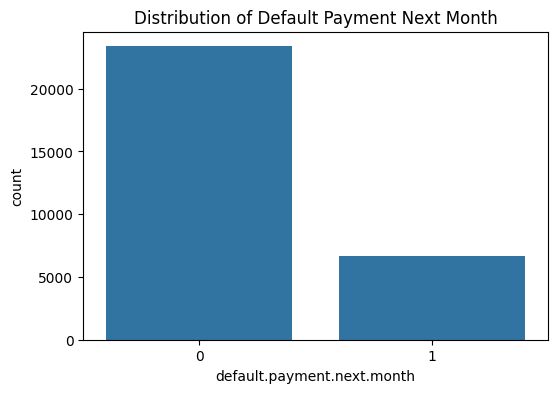

In [13]:
# Distribution of target variable
plt.figure(figsize=(6, 4))
sns.countplot(x=y)
plt.title('Distribution of Default Payment Next Month')
plt.show()

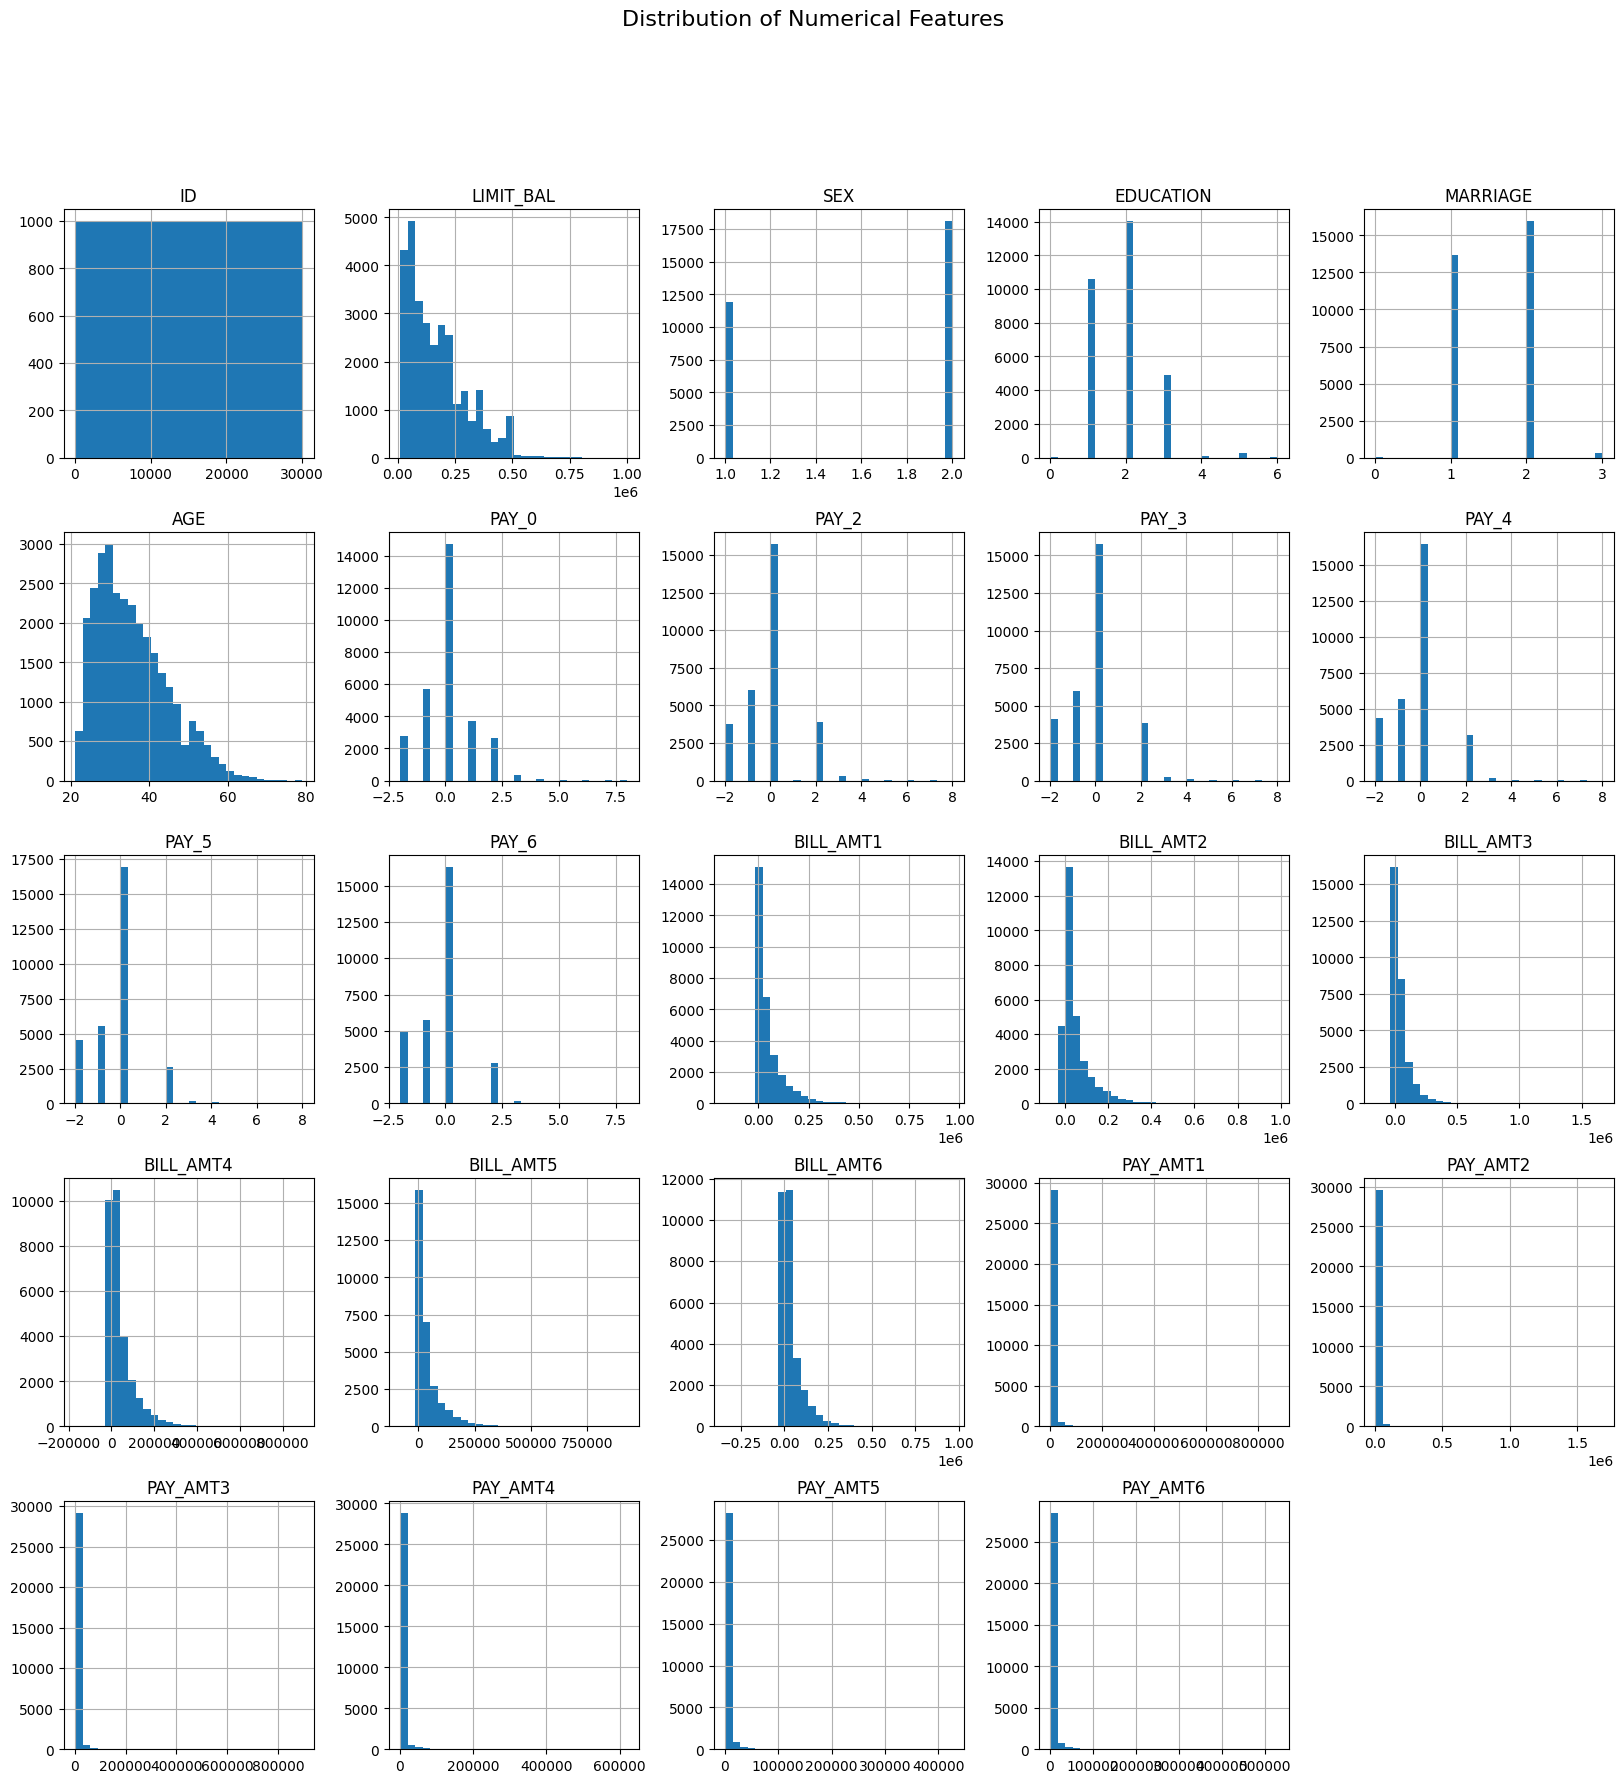

In [14]:
# Distribution of numerical features
X.hist(figsize=(20, 20), bins=30)
plt.suptitle('Distribution of Numerical Features', fontsize=16)
plt.show()

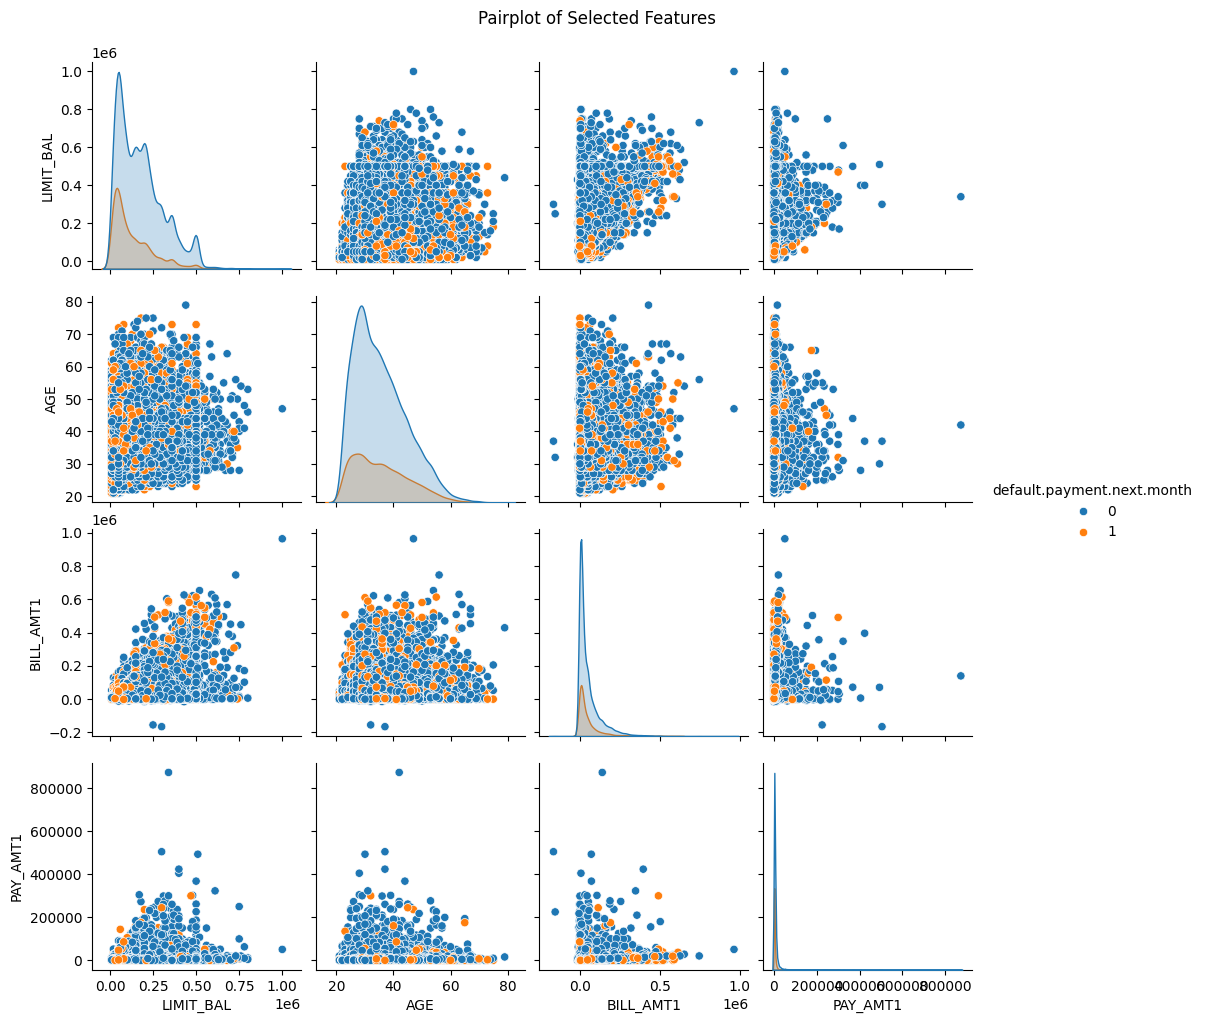

In [15]:
# Pairplot of selected features
sns.pairplot(df[['LIMIT_BAL', 'AGE', 'BILL_AMT1', 'PAY_AMT1', 'default.payment.next.month']], hue='default.payment.next.month')
plt.suptitle('Pairplot of Selected Features', y=1.02)
plt.show()

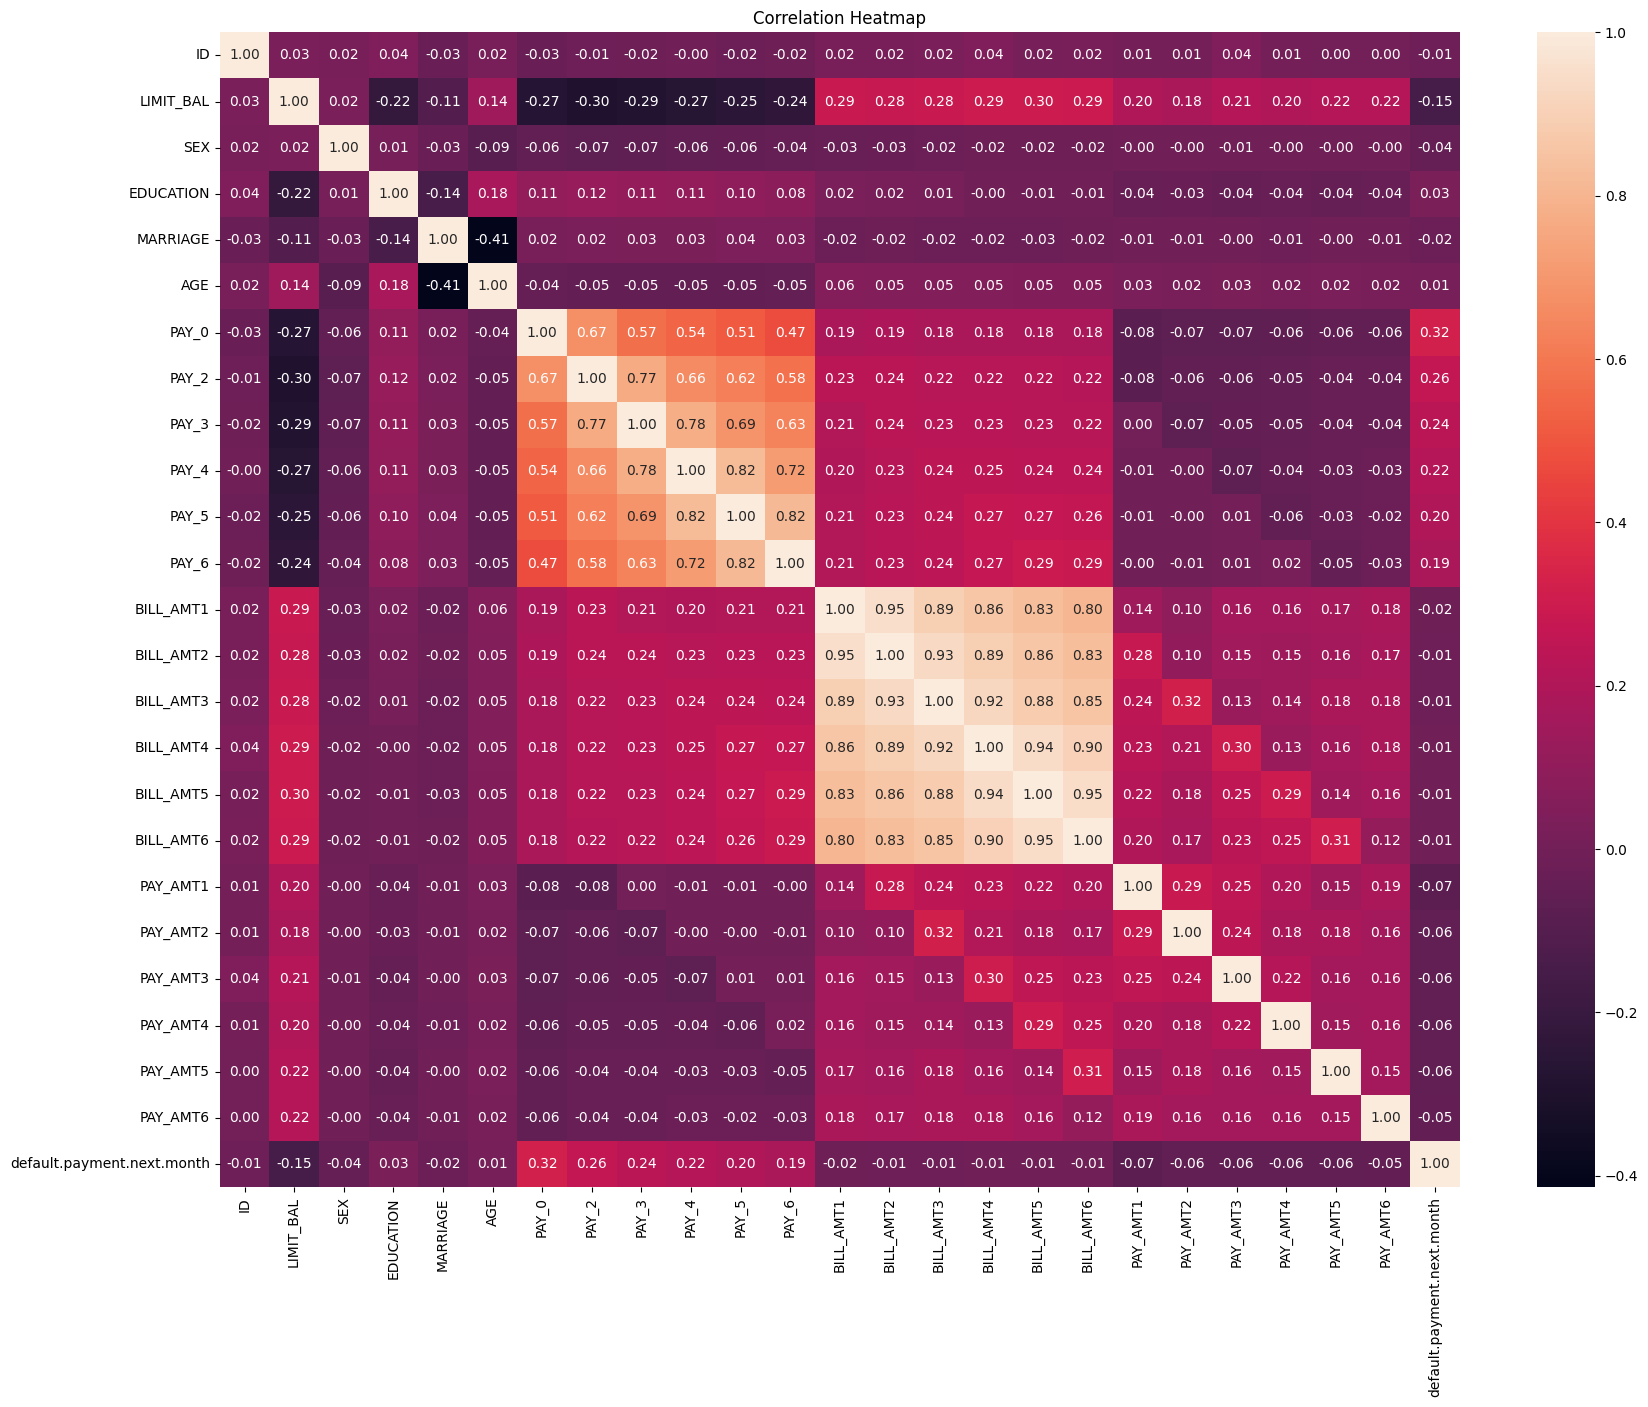

In [16]:
# Correlation heatmap
plt.figure(figsize=(20, 15))
sns.heatmap(df.corr(), annot=True, fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

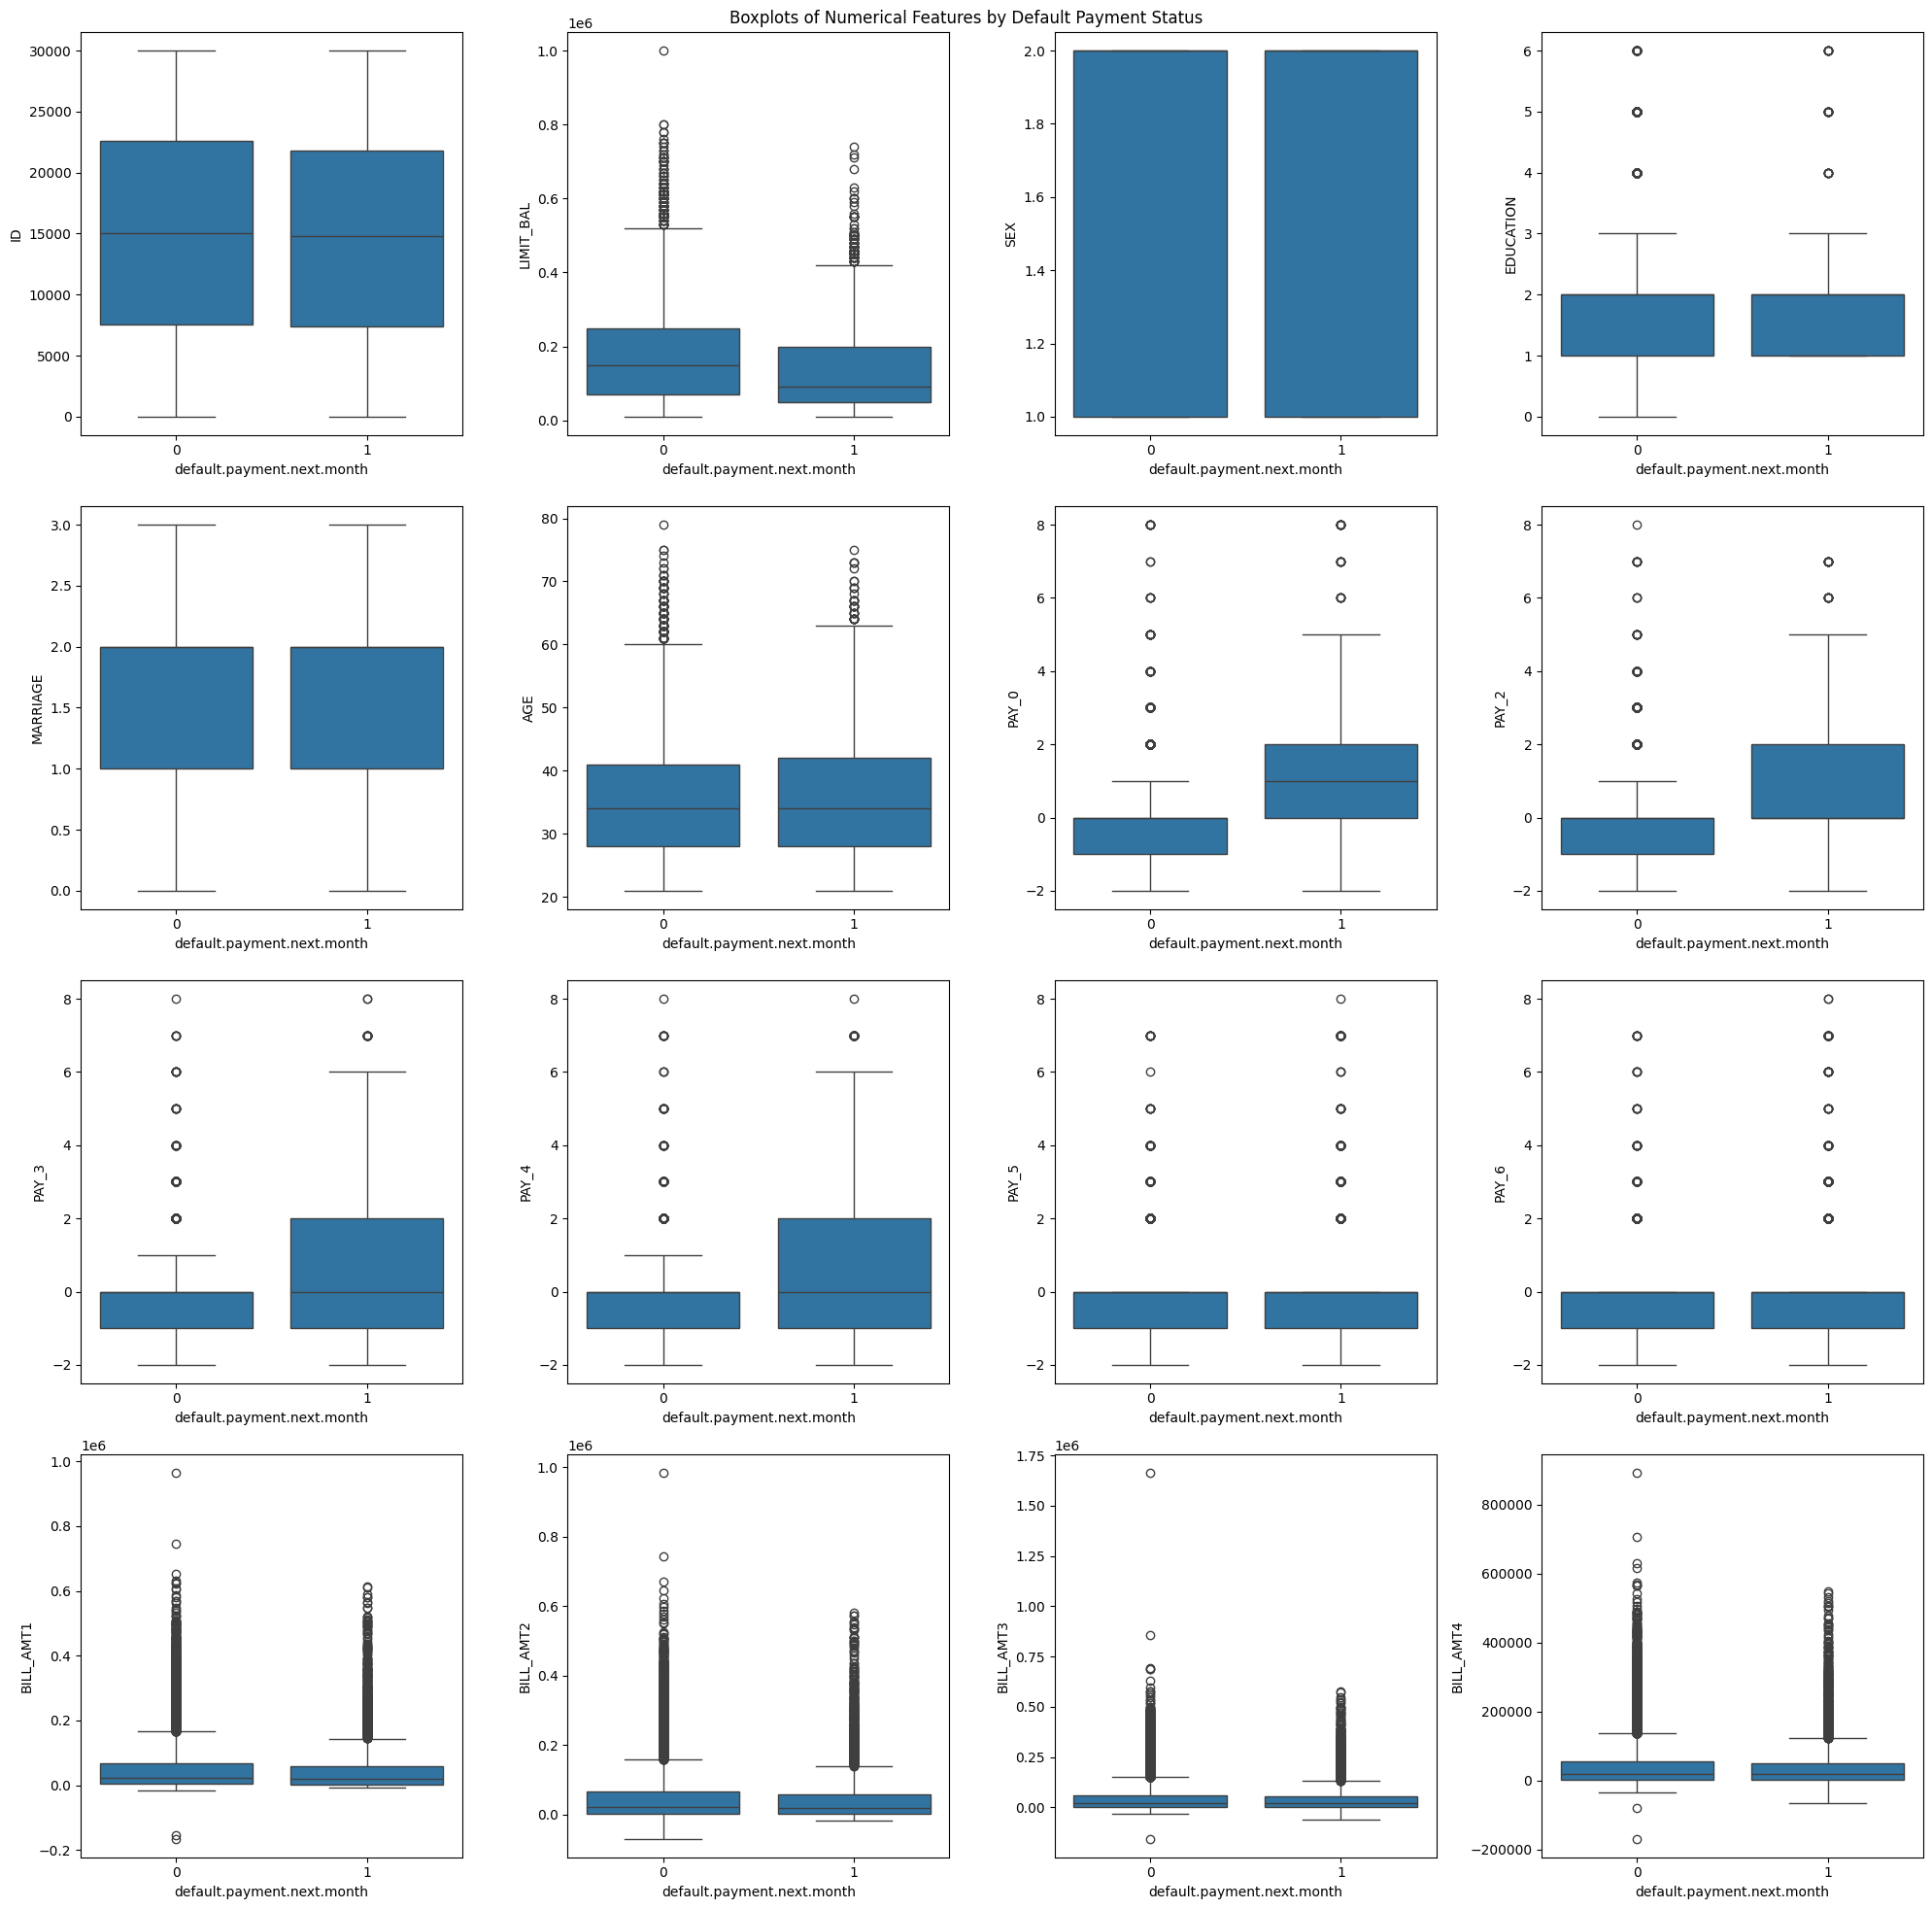

In [17]:
# Boxplot of numerical features by target
fig, axes = plt.subplots(4, 4, figsize=(20, 20))
fig.suptitle('Boxplots of Numerical Features by Default Payment Status')
numerical_features = df.drop(columns=['default.payment.next.month']).columns
for i, ax in enumerate(axes.flatten()):
    if i < len(numerical_features):
        sns.boxplot(x='default.payment.next.month', y=numerical_features[i], data=df, ax=ax)
plt.tight_layout()
plt.show()

In [18]:
# Creating interaction features
df['LIMIT_BAL_AGE'] = df['LIMIT_BAL'] * df['AGE']
df['BILL_TOTAL'] = df[['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']].sum(axis=1)
df['PAY_TOTAL'] = df[['PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']].sum(axis=1)

In [19]:
# Selected features including new features
selected_features = ['LIMIT_BAL', 'AGE', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 
                     'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 
                     'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'LIMIT_BAL_AGE',
                     'BILL_TOTAL', 'PAY_TOTAL']

X_selected = df[selected_features]
X_selected_scaled = scaler.fit_transform(X_selected)

In [20]:
from imblearn.over_sampling import SMOTE

# Handling class imbalance using SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_selected_scaled, y)

In [21]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve, auc

In [22]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

Logistic Regression

Classification Report:
              precision    recall  f1-score   support

           0       0.64      0.49      0.55      4664
           1       0.59      0.72      0.65      4682

    accuracy                           0.61      9346
   macro avg       0.61      0.61      0.60      9346
weighted avg       0.61      0.61      0.60      9346


Testing Accuracy: 0.6056066766531136

ROC AUC Score: 0.6582979832986885

Confusion Matrix:



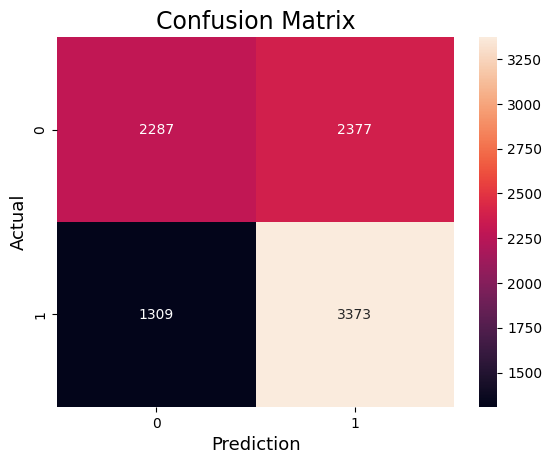

In [23]:
# Logistic Regression with hyperparameter tuning
param_grid_lr = {'C': [0.1, 1, 10, 100]}
grid_search_lr = GridSearchCV(LogisticRegression(), param_grid_lr, cv=5, scoring='roc_auc')
grid_search_lr.fit(X_train, y_train)

# Best model and evaluation
best_lr = grid_search_lr.best_estimator_
y_pred_lr = best_lr.predict(X_test)
y_pred_prob_lr = best_lr.predict_proba(X_test)[:, 1]
cm_lr = confusion_matrix(y_test, y_pred_lr)
cr_lr = classification_report(y_test, y_pred_lr)
auc_score_lr = roc_auc_score(y_test, y_pred_prob_lr)

fpr_lr, tpr_lr, _ = roc_curve(y_test, y_pred_prob_lr)
roc_auc_lr = auc(fpr_lr, tpr_lr)

# Print results
print("Logistic Regression")
print(f"\nClassification Report:\n{cr_lr}")
TP=cm_lr[0][0]
TN=cm_lr[1][1]
FN=cm_lr[1][0]
FP=cm_lr[0][1]
print('\nTesting Accuracy:',(TP+TN)/(TP+TN+FN+FP))
print(f"\nROC AUC Score: {auc_score_lr}\n")

print(f"Confusion Matrix:\n")
sns.heatmap(cm_lr, 
            annot=True,
            fmt='g')
plt.xlabel('Prediction',fontsize=13)
plt.ylabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()

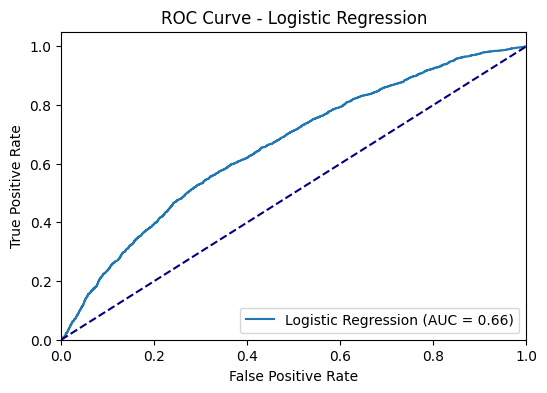

In [21]:
# Plot ROC Curve
plt.figure(figsize=(6, 4))
plt.plot(fpr_lr, tpr_lr, label=f'Logistic Regression (AUC = {roc_auc_lr:.2f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Logistic Regression')
plt.legend(loc='lower right')
plt.show()

Decision Tree

Best Model: DecisionTreeClassifier(max_depth=10)
Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.72      0.70      4664
           1       0.70      0.65      0.67      4682

    accuracy                           0.69      9346
   macro avg       0.69      0.69      0.69      9346
weighted avg       0.69      0.69      0.69      9346


Testing Accuracy: 0.6860689064840574

ROC AUC Score: 0.7482740411986198

Confusion Matrix:



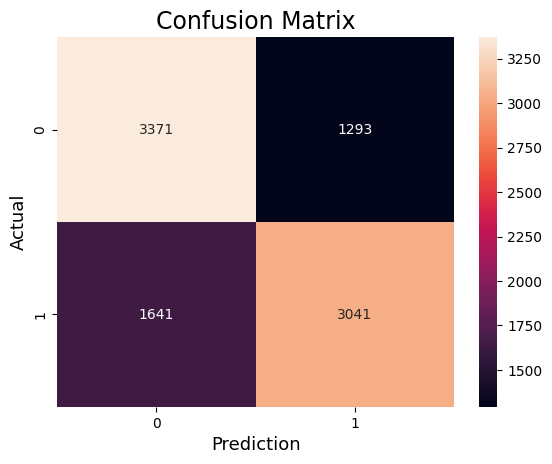

In [22]:
# Decision Tree with hyperparameter tuning
param_grid_dt = {'max_depth': [5, 10, 20, None]}
grid_search_dt = GridSearchCV(DecisionTreeClassifier(), param_grid_dt, cv=5, scoring='roc_auc')
grid_search_dt.fit(X_train, y_train)

# Best model and evaluation
best_dt = grid_search_dt.best_estimator_
y_pred_dt = best_dt.predict(X_test)
y_pred_prob_dt = best_dt.predict_proba(X_test)[:, 1]
cm_dt = confusion_matrix(y_test, y_pred_dt)
cr_dt = classification_report(y_test, y_pred_dt)
auc_score_dt = roc_auc_score(y_test, y_pred_prob_dt)

fpr_dt, tpr_dt, _ = roc_curve(y_test, y_pred_prob_dt)
roc_auc_dt = auc(fpr_dt, tpr_dt)

# Print results
print("Decision Tree")
print(f"\nBest Model: {best_dt}")
print(f"Classification Report:\n{cr_dt}")
TP=cm_dt[0][0]
TN=cm_dt[1][1]
FN=cm_dt[1][0]
FP=cm_dt[0][1]
print('\nTesting Accuracy:',(TP+TN)/(TP+TN+FN+FP))
print(f"\nROC AUC Score: {auc_score_dt}\n")

print(f"Confusion Matrix:\n")
sns.heatmap(cm_dt, 
            annot=True,
            fmt='g')
plt.xlabel('Prediction',fontsize=13)
plt.ylabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()

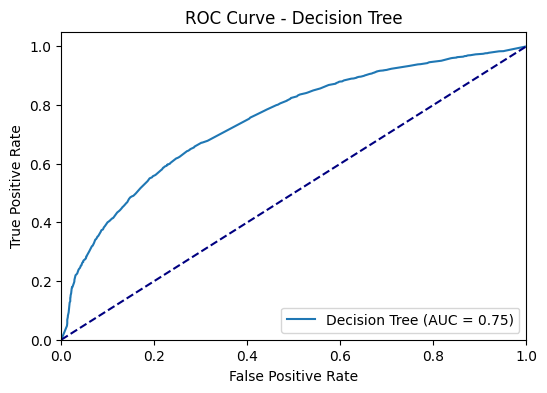

In [23]:
# Plot ROC Curve
plt.figure(figsize=(6, 4))
plt.plot(fpr_dt, tpr_dt, label=f'Decision Tree (AUC = {roc_auc_dt:.2f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Decision Tree')
plt.legend(loc='lower right')
plt.show()

K-Nearest Neighbors (KNN)
Best Model: KNeighborsClassifier(n_neighbors=3)
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.65      0.75      4664
           1       0.72      0.92      0.81      4682

    accuracy                           0.79      9346
   macro avg       0.81      0.79      0.78      9346
weighted avg       0.81      0.79      0.78      9346


Testing Accuracy: 0.7858977102503745

ROC AUC Score: 0.8552667949147239

Confusion Matrix:



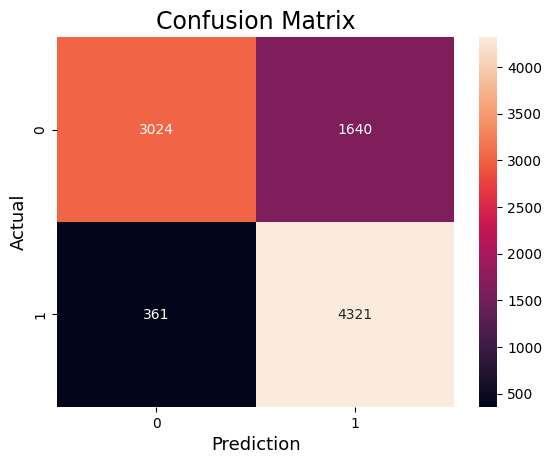

In [24]:
# KNN with hyperparameter tuning
param_grid_knn = {'n_neighbors': [3, 5, 7, 9]}
grid_search_knn = GridSearchCV(KNeighborsClassifier(), param_grid_knn, cv=5, scoring='roc_auc')
grid_search_knn.fit(X_train, y_train)

# Best model and evaluation
best_knn = grid_search_knn.best_estimator_
y_pred_knn = best_knn.predict(X_test)
y_pred_prob_knn = best_knn.predict_proba(X_test)[:, 1]
cm_knn = confusion_matrix(y_test, y_pred_knn)
cr_knn = classification_report(y_test, y_pred_knn)
auc_score_knn = roc_auc_score(y_test, y_pred_prob_knn)

fpr_knn, tpr_knn, _ = roc_curve(y_test, y_pred_prob_knn)
roc_auc_knn = auc(fpr_knn, tpr_knn)

# Print results
print("K-Nearest Neighbors (KNN)")
print(f"Best Model: {best_knn}")
print(f"Classification Report:\n{cr_knn}")
TP=cm_knn[0][0]
TN=cm_knn[1][1]
FN=cm_knn[1][0]
FP=cm_knn[0][1]
print('\nTesting Accuracy:',(TP+TN)/(TP+TN+FN+FP))
print(f"\nROC AUC Score: {auc_score_knn}\n")

print(f"Confusion Matrix:\n")
sns.heatmap(cm_knn, 
            annot=True,
            fmt='g')
plt.xlabel('Prediction',fontsize=13)
plt.ylabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()

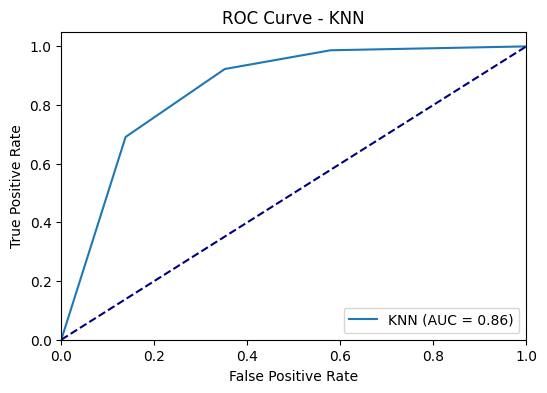

In [25]:
# Plot ROC Curve
plt.figure(figsize=(6, 4))
plt.plot(fpr_knn, tpr_knn, label=f'KNN (AUC = {roc_auc_knn:.2f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - KNN')
plt.legend(loc='lower right')
plt.show()

Random Forest
Best Model: RandomForestClassifier(max_depth=10)
Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.72      0.73      4664
           1       0.73      0.74      0.74      4682

    accuracy                           0.73      9346
   macro avg       0.73      0.73      0.73      9346
weighted avg       0.73      0.73      0.73      9346


Testing Accuracy: 0.7311149154718596
ROC AUC Score: 0.8088374063875886

Confusion Matrix:



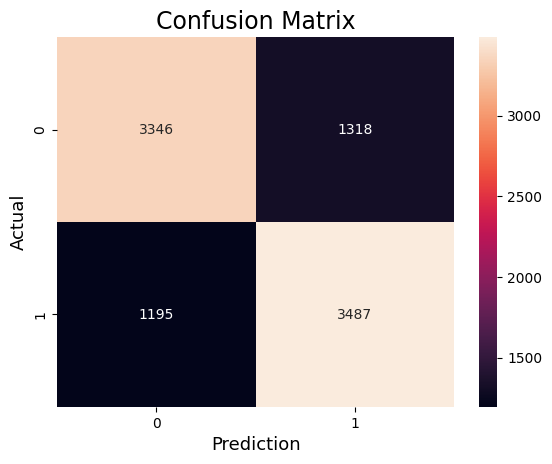

In [26]:
# Random Forest with reduced hyperparameter search space and fewer CV folds
param_grid_rf = {'n_estimators': [50, 100], 'max_depth': [5, 10]}
grid_search_rf = GridSearchCV(RandomForestClassifier(), param_grid_rf, cv=3, scoring='roc_auc', n_jobs=-1)
grid_search_rf.fit(X_train, y_train)

# Best model and evaluation
best_rf = grid_search_rf.best_estimator_
y_pred_rf = best_rf.predict(X_test)
y_pred_prob_rf = best_rf.predict_proba(X_test)[:, 1]
cm_rf = confusion_matrix(y_test, y_pred_rf)
cr_rf = classification_report(y_test, y_pred_rf)
auc_score_rf = roc_auc_score(y_test, y_pred_prob_rf)

fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_prob_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)

# Print results
print("Random Forest")
print(f"Best Model: {best_rf}")
print(f"Classification Report:\n{cr_rf}")
TP=cm_rf[0][0]
TN=cm_rf[1][1]
FN=cm_rf[1][0]
FP=cm_rf[0][1]
print('\nTesting Accuracy:',(TP+TN)/(TP+TN+FN+FP))
print(f"ROC AUC Score: {auc_score_rf}\n")

print(f"Confusion Matrix:\n")
sns.heatmap(cm_rf, 
            annot=True,
            fmt='g')
plt.xlabel('Prediction',fontsize=13)
plt.ylabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()

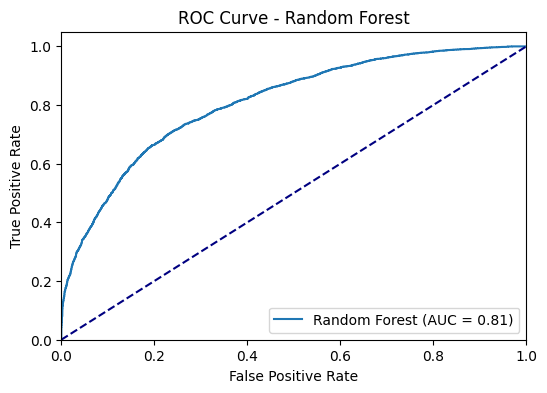

In [27]:
# Plot ROC Curve
plt.figure(figsize=(6, 4))
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {roc_auc_rf:.2f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Random Forest')
plt.legend(loc='lower right')
plt.show()

Support Vector Machine (SVM)
Best Model: SVC(C=10, probability=True)
Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.53      0.61      4664
           1       0.63      0.79      0.70      4682

    accuracy                           0.66      9346
   macro avg       0.67      0.66      0.66      9346
weighted avg       0.67      0.66      0.66      9346


Testing Accuracy: 0.6610314573079392

ROC AUC Score: 0.7272500133718932

Confusion Matrix:



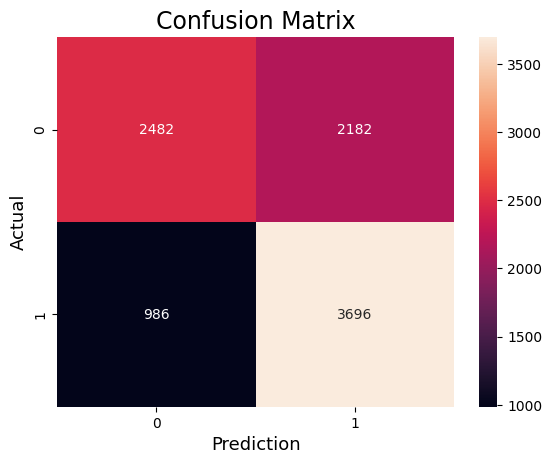

In [28]:
# SVM with reduced hyperparameter search space and fewer CV folds
param_grid_svc = {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}
grid_search_svc = GridSearchCV(SVC(probability=True), param_grid_svc, cv=3, scoring='roc_auc', n_jobs=-1)
grid_search_svc.fit(X_train, y_train)

# Best model and evaluation
best_svc = grid_search_svc.best_estimator_
y_pred_svc = best_svc.predict(X_test)
y_pred_prob_svc = best_svc.predict_proba(X_test)[:, 1]
cm_svc = confusion_matrix(y_test, y_pred_svc)
cr_svc = classification_report(y_test, y_pred_svc)
auc_score_svc = roc_auc_score(y_test, y_pred_prob_svc)

fpr_svc, tpr_svc, _ = roc_curve(y_test, y_pred_prob_svc)
roc_auc_svc = auc(fpr_svc, tpr_svc)

# Print results
print("Support Vector Machine (SVM)")
print(f"Best Model: {best_svc}")
print(f"Classification Report:\n{cr_svc}")
TP=cm_svc[0][0]
TN=cm_svc[1][1]
FN=cm_svc[1][0]
FP=cm_svc[0][1]
print('\nTesting Accuracy:',(TP+TN)/(TP+TN+FN+FP))
print(f"\nROC AUC Score: {auc_score_svc}\n")

print(f"Confusion Matrix:\n")
sns.heatmap(cm_svc, 
            annot=True,
            fmt='g')
plt.xlabel('Prediction',fontsize=13)
plt.ylabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()

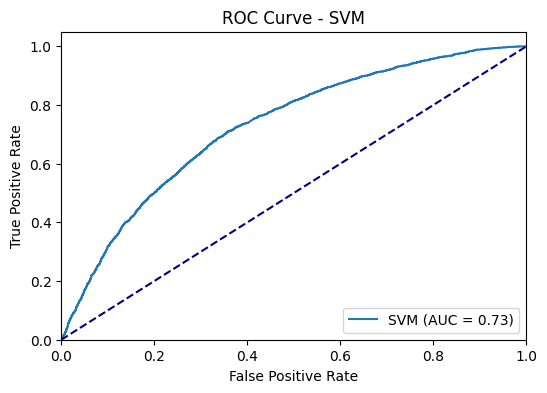

In [32]:
# Plot ROC Curve
plt.figure(figsize=(6, 4))
plt.plot(fpr_svc, tpr_svc, label=f'SVM (AUC = {roc_auc_svc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - SVM')
plt.legend(loc='lower right')
plt.show()

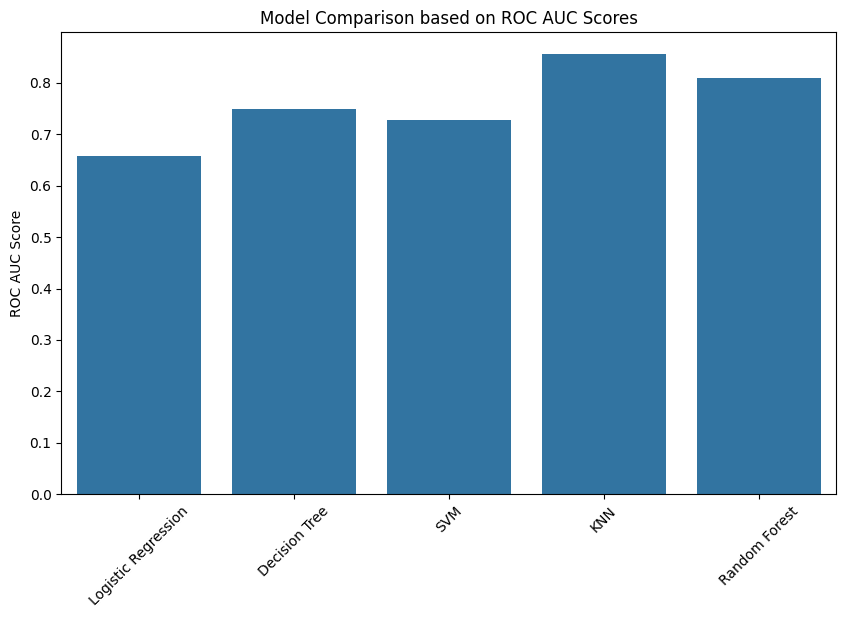

In [33]:
# Extracting ROC AUC scores for comparison
auc_scores = {
    'Logistic Regression': auc_score_lr,
    'Decision Tree': auc_score_dt,
    'SVM': auc_score_svc,
    'KNN': auc_score_knn,
    'Random Forest': auc_score_rf
}

# Plotting the ROC AUC scores
plt.figure(figsize=(10, 6))
sns.barplot(x=list(auc_scores.keys()), y=list(auc_scores.values()))
plt.title('Model Comparison based on ROC AUC Scores')
plt.ylabel('ROC AUC Score')
plt.xticks(rotation=45)
plt.show()

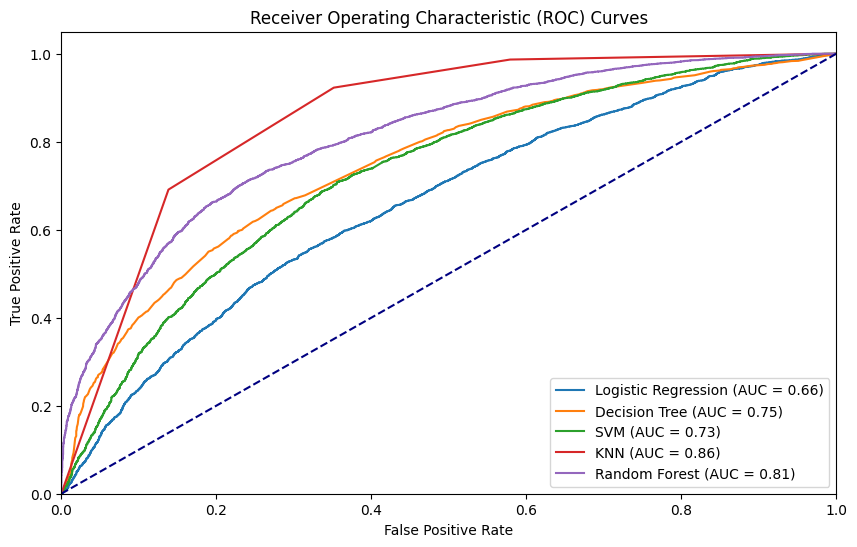

In [34]:
# Plotting ROC Curves
plt.figure(figsize=(10, 6))
plt.plot(fpr_lr, tpr_lr, label=f'Logistic Regression (AUC = {roc_auc_lr:.2f})')
plt.plot(fpr_dt, tpr_dt, label=f'Decision Tree (AUC = {roc_auc_dt:.2f})')
plt.plot(fpr_svc, tpr_svc, label=f'SVM (AUC = {roc_auc_svc:.2f})')
plt.plot(fpr_knn, tpr_knn, label=f'KNN (AUC = {roc_auc_knn:.2f})')
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {roc_auc_rf:.2f})')

plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curves')
plt.legend(loc='lower right')
plt.show()

In [26]:
import joblib
# Save the best KNN model
joblib.dump(best_knn, 'knn_model.pkl')

print("Model saved to knn_model.pkl")

Model saved to knn_model.pkl
